In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

os.chdir('/Users/jennlauralee/GitHub Repos/space-number/DATA')


In [4]:
def plot_explor_stats(alldata):
    plt.figure()
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        plt.scatter(subdata.x_mean,subdata.Resp_loc)
        plt.xlabel('true mean')
        plt.ylabel('response')

    plt.figure()
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        plt.scatter(subdata.Resp_loc,subdata.Resp_conf)
        plt.xlabel('Resp location')
        plt.ylabel('Resp confidence range')

    plt.figure()
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        xstd = []
        for ii in subdata.index.values:
            xstd.append(np.std(subdata.X[ii]))
        maxrange= []
        for ii in subdata.index.values:
            maxrange.append(np.abs(np.max(subdata.X[ii])- np.min(subdata.X[ii])))

        plt.scatter(maxrange,subdata.Resp_conf)
        plt.xlabel('Max range')
        plt.ylabel('Confidence range')
        
    plt.figure()    
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        xstd = []
        for ii in subdata.index.values:
            xstd.append(np.std(subdata.X[ii]))

        plt.scatter(xstd,subdata.Resp_conf)
        plt.xlabel('STD')
        plt.ylabel('Confidence range')
        plt.rcParams.update({'font.size': 18})
        sb.despine()

    plt.figure()
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        plt.scatter(subdata.x_mean, subdata.Resp_loc - subdata.x_mean)
        plt.xlabel('True mean')
        plt.ylabel('Error')

    plt.figure()
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        plt.scatter(subdata.x_mean, subdata.Resp_loc - subdata.x_mean)
        plt.xlabel('True mean')
        plt.ylabel('Error')
        
    plt.figure()
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        xstd = []
        for ii in subdata.index.values:
            xstd.append(np.std(subdata.X[ii]))

        plt.scatter(xstd, np.abs(subdata.Resp_loc - subdata.x_mean))
        plt.xlabel('STD')
        plt.ylabel('Error')
        sb.despine()

    plt.figure()
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        plt.scatter(subdata.RT_resp,subdata.Resp_conf)
        plt.xlabel('RT resp')
        plt.ylabel('confidence range')

    plt.figure()
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        Ns = [2,3,4,5,6]
        for N in Ns:
            indN = subdata.N == N
            meanRT_N = np.mean(subdata.RT_resp[indN])
            plt.bar(N, meanRT_N)
            plt.xlabel('N')
            plt.ylabel('RT resp')

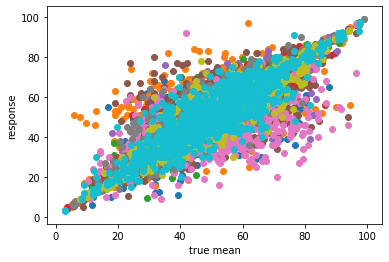

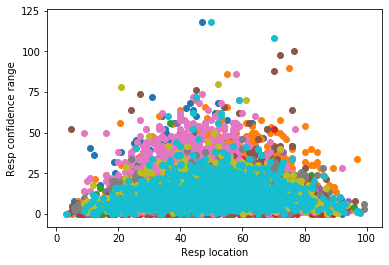

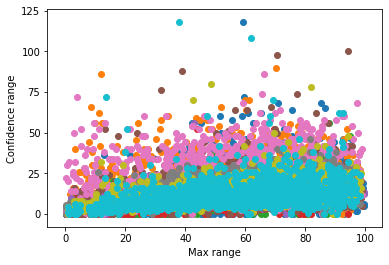

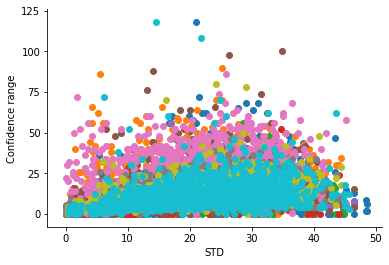

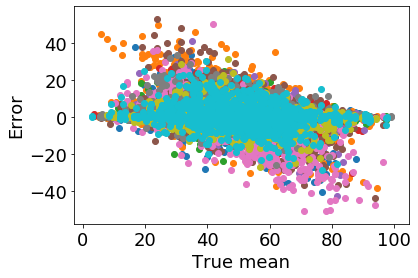

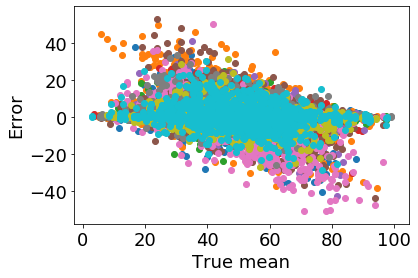

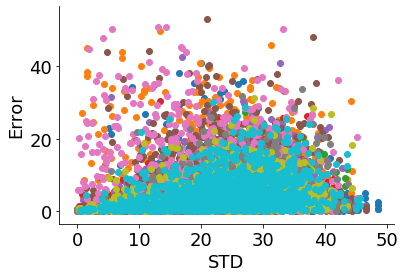

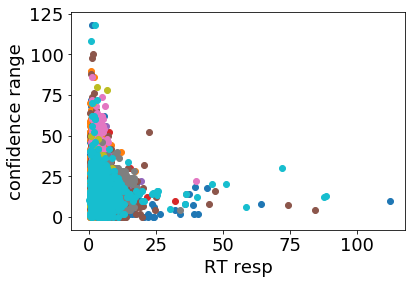

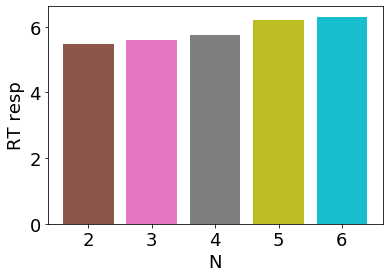

In [5]:
alldata = pd.read_pickle('alldata.pkl')

plot_explor_stats(alldata)


In [8]:
np.abs(subdata.Resp_loc - subdata.x_mean)

NameError: name 'subdata' is not defined

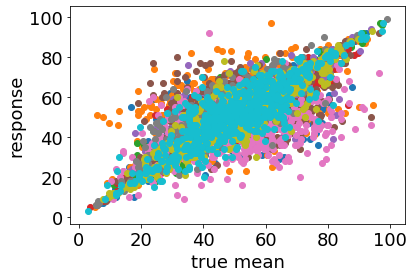

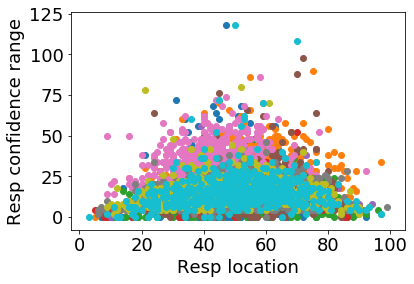

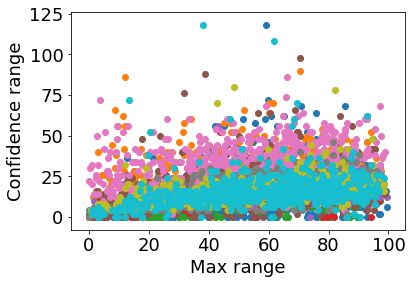

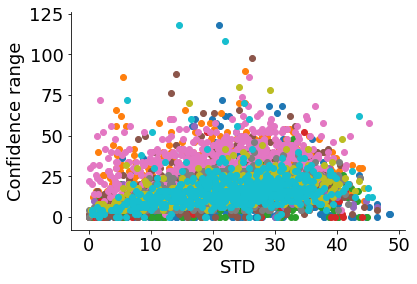

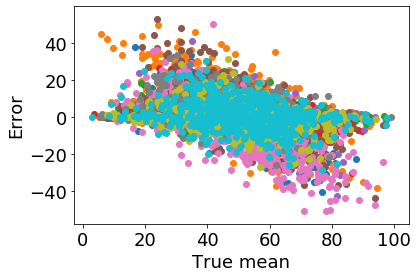

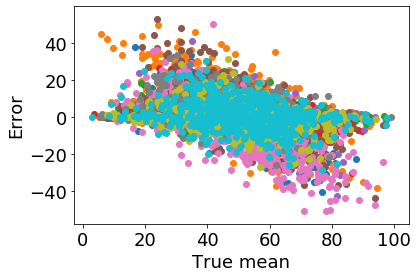

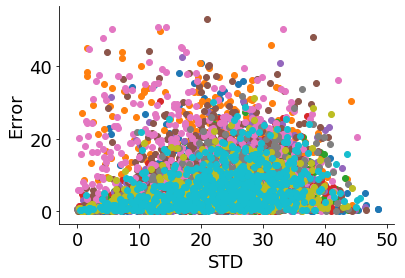

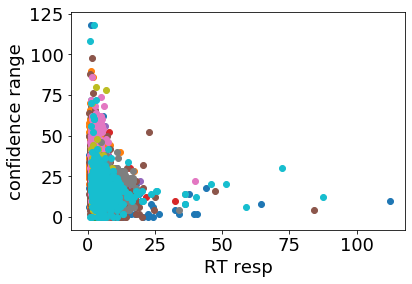

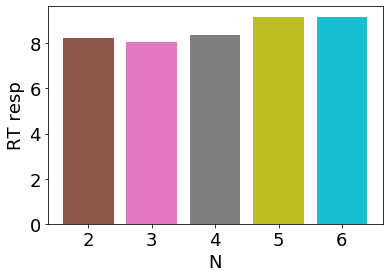

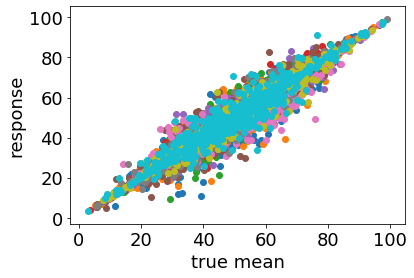

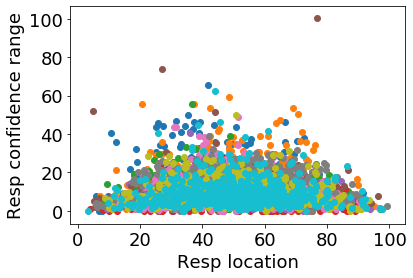

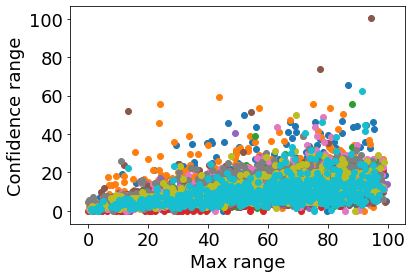

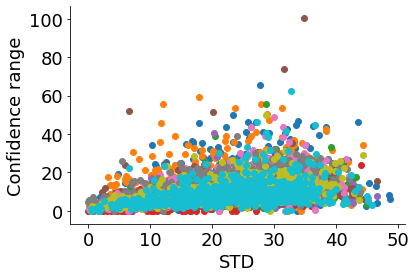

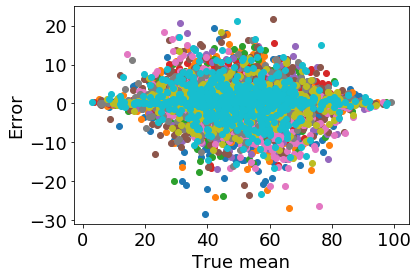

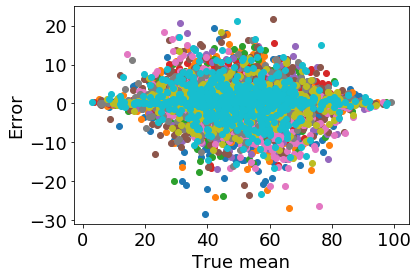

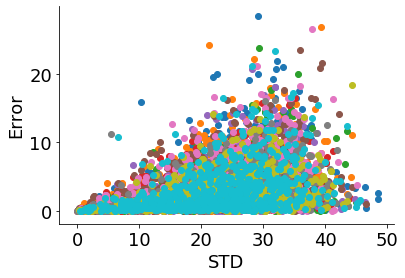

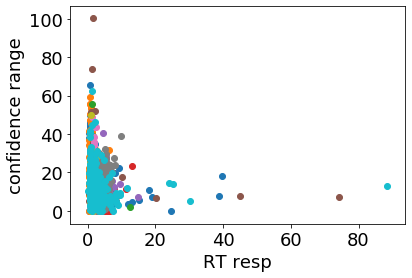

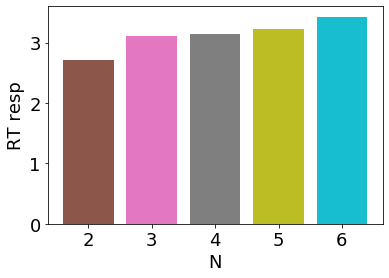

In [7]:
# SUMM STATS BY BLOCK TYPE
numdata = alldata[alldata["Num_block"]==1]
plot_explor_stats(numdata)

spacedata = alldata[alldata["Num_block"]==0]
plot_explor_stats(spacedata)

In [ ]:
errormean_num_sub = []
errormean_space_sub = []
errorstd_num_sub = []
errorstd_space_sub = []

for i_sub in range(0,10):
    s_numdata = numdata[numdata["Sub_ID"]==i_sub+1]
    s_spacedata = spacedata[spacedata["Sub_ID"]==i_sub+1]
    errormean_num_sub.append(np.mean(np.abs([s_numdata.Resp_loc - s_numdata.x_mean])))
    errorstd_num_sub.append(np.std(np.abs([s_numdata.Resp_loc - s_numdata.x_mean])))
    
    errormean_space_sub.append(np.mean(np.abs([s_spacedata.Resp_loc - s_spacedata.x_mean])))
    errorstd_space_sub.append(np.std(np.abs([s_spacedata.Resp_loc - s_spacedata.x_mean])))
    
plt.figure()
plt.errorbar(['Number', 'Space'], [np.mean(errormean_num_sub), np.mean(errormean_space_sub)], [np.std(errormean_num_sub), np.std(errormean_space_sub)], fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.ylabel('Absolute Error')

plt.rcParams.update({'font.size': 18})
sb.despine()

In [ ]:
rangemean_num_sub = []
rangemean_space_sub = []
rangestd_num_sub = []
rangestd_space_sub = []

for i_sub in range(0,10):
    s_numdata = numdata[numdata["Sub_ID"]==i_sub+1]
    s_spacedata = spacedata[spacedata["Sub_ID"]==i_sub+1]
    rangemean_num_sub.append(np.mean(s_numdata.Resp_conf))
    rangestd_num_sub.append(np.std(s_numdata.Resp_conf))
    
    rangemean_space_sub.append(np.mean(s_spacedata.Resp_conf))
    rangestd_space_sub.append(np.std(s_spacedata.Resp_conf))
    
plt.figure()
plt.errorbar(['Number', 'Space'], [np.mean(errormean_num_sub), np.mean(errormean_space_sub)], [np.std(errormean_num_sub), np.std(errormean_space_sub)], fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.ylabel('Confidence range')

plt.rcParams.update({'font.size': 18})
sb.despine()

Text(0.5, 1.0, 'Space')

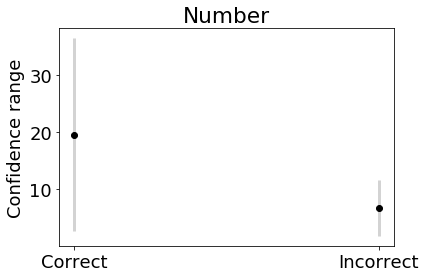

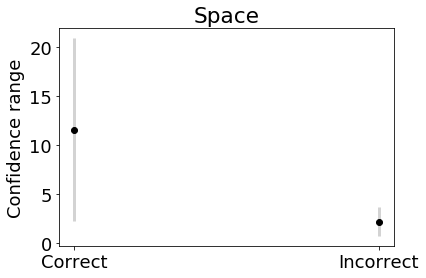

In [9]:
rangemean_num_correct = []
rangemean_num_incorrect = []
rangestd_num_correct = []
rangestd_num_incorrect = []

for i_sub in range(0,10):
    s_numdata = numdata[numdata["Sub_ID"]==i_sub+1]
    rangemean_num_correct.append(np.mean(s_numdata[s_numdata["Correct"]==1].Resp_conf))
    rangestd_num_correct.append(np.std(s_numdata[s_numdata["Correct"]==1].Resp_conf))
    
    rangemean_num_incorrect.append(np.mean(s_numdata[s_numdata["Correct"]==0].Resp_conf))
    rangestd_num_incorrect.append(np.std(s_numdata[s_numdata["Correct"]==0].Resp_conf))

plt.figure()
plt.errorbar(['Correct', 'Incorrect'], [np.mean(rangemean_num_correct), np.std(rangemean_num_correct)], [np.mean(rangemean_num_incorrect), np.std(rangemean_num_incorrect)], fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.ylabel('Confidence range')
plt.title('Number')

####

rangemean_space_correct = []
rangemean_space_incorrect = []
rangestd_space_correct = []
rangestd_space_incorrect = []

for i_sub in range(0,10):
    s_spacedata = spacedata[spacedata["Sub_ID"]==i_sub+1]
    rangemean_space_correct.append(np.mean(s_spacedata[s_spacedata["Correct"]==1].Resp_conf))
    rangestd_space_correct.append(np.std(s_spacedata[s_spacedata["Correct"]==1].Resp_conf))
    
    rangemean_space_incorrect.append(np.mean(s_spacedata[s_spacedata["Correct"]==0].Resp_conf))
    rangestd_space_incorrect.append(np.std(s_spacedata[s_spacedata["Correct"]==0].Resp_conf))

plt.figure()
plt.errorbar(['Correct', 'Incorrect'],  [np.mean(rangemean_space_correct), np.std(rangemean_space_correct)], [np.mean(rangemean_space_incorrect), np.std(rangemean_space_incorrect)] , fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.ylabel('Confidence range')
plt.title('Space')


[8.90069444 9.20416667 9.52743056 9.67604167 9.78958333]


Text(0.5, 1.0, 'Number')

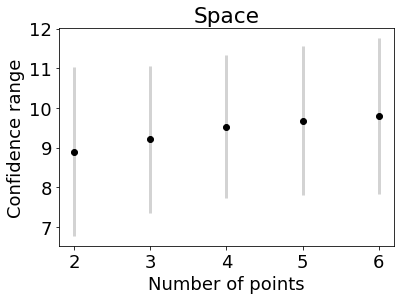

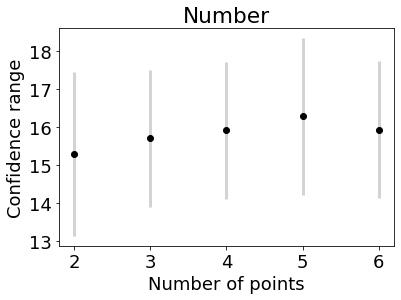

In [13]:
# RANGE BY N

def range_by_N(alldata):
    for i_sub in range(0,10):
        rangemean_N_sub=[]
        s_data = alldata[alldata["Sub_ID"]==i_sub+1]
        Ns = [2,3,4,5,6]

        for N in Ns:
            indN = s_data.N == N
            rangemean_N_sub.append(np.mean(s_data.Resp_conf[indN]))
        rangemean_N_sub.append(np.transpose(rangemean_N_sub))

    rangemean_N = np.mean(rangemean_N_sub,0)
    rangestd_N = np.std(rangemean_N_sub,0)
              
    return rangemean_N, rangestd_N

Ns = [2,3,4,5,6]

rangemean_N_space, rangestd_N_space = range_by_N(spacedata)
rangemean_N_num, rangestd_N_num = range_by_N(numdata)

print(rangemean_N_space)

plt.figure()
plt.errorbar(Ns, rangemean_N_space, rangestd_N_space, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.ylabel('Confidence range')
plt.xlabel('Number of points')
plt.title('Space')

plt.figure()
plt.errorbar(Ns, rangemean_N_num, rangestd_N_num, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.ylabel('Confidence range')
plt.xlabel('Number of points')
plt.title('Number')


In [10]:
rangemean_N = []

for i_sub in range(0,10):
    rangemean_N_sub=[]
    rangestd_N_sub=[]
    s_data = alldata[alldata["Sub_ID"]==i_sub+1]
    Ns = [2,3,4,5,6]

    for N in Ns:
        indN = s_data.N == N
        rangemean_N_sub.append(np.mean(s_data.Resp_conf[indN]))
        rangestd_N_sub.append(np.std(s_data.Resp_conf[indN]))
        
    rangemean_N.append(np.transpose(rangemean_N_sub))
    
np.mean(rangemean_N,0)

array([12.02770833, 14.36260417, 15.17479167, 16.08416667, 16.5875    ])

In [11]:
rangemean_N = []
rangestd_N = []
for i_sub in range(0,10):
    s_data = alldata[alldata["Sub_ID"]==i_sub+1]
    Ns = [2,3,4,5,6]
    
    for N in Ns:
        indN = s_data.N == N
        rangemean_N.append(np.mean(s_data.Resp_conf[indN]))
        rangestd_N.append(np.std(s_data.Resp_conf[indN]))
        


In [12]:
def quantize_stim(alldata):
    labels8 = range(1,9)
    xstd_quant = []
    maxrange_quant = []
    for i_sub in range(0,10):
        subdata = alldata[alldata["Sub_ID"]==i_sub+1]
        xstd = [] #vector of trial stds
        maxrange= [] #vector of maxrange stds
        for ii in subdata.index.values:
            xstd.append(np.std(subdata.X[ii])) 
            maxrange.append(np.abs(np.max(subdata.X[ii])- np.min(subdata.X[ii])))
            
        test = np.asarray(pd.qcut(xstd,8,labels=labels8)
        xstd_quant.append(test)
        maxrange_quant.append(pd.qcut(maxrange,8,labels=labels8))
    
    #alldata['xstd_quant'] = xstd_quant
    #alldata['maxrange_quant'] = maxrange_quant

    return xstd_quant, maxrange_quant

xstd_quant, maxrange_quant = quantize_stim(alldata)


SyntaxError: invalid syntax (<ipython-input-12-2afa55c3c2b1>, line 14)

In [13]:
#spearman rho for num vs. space on STD vs. confidence range
#quantile confidence and plot error: ask if people are decreasing confidence with increasing error

# STD AND CONFIDENCE
from scipy.stats import spearmanr,ttest_rel

coef = []
p = []
for i_sub in range(0,10):
    subdata = alldata[alldata["Sub_ID"]==i_sub+1]
    xstd_s = []
    for ii in subdata.index.values:
        xstd_s.append(np.std(subdata.X[ii]))
        
    conf_s = subdata.Resp_conf
    coef_s, p_s = spearmanr(xstd_s, conf_s)
    coef.append(coef_s)
    p.append(p_s)
print(coef)


# numdata
coef = []
p = []
for i_sub in range(0,10):
    subdata = numdata[numdata["Sub_ID"]==i_sub+1]
    xstd_s = []
    for ii in subdata.index.values:
        xstd_s.append(np.std(subdata.X[ii]))
        
    conf_s = subdata.Resp_conf
    coef_s, p_s = spearmanr(xstd_s, conf_s)
    coef.append(coef_s)
    p.append(p_s)
coef_num = coef

# spacedata
coef = []
p = []
for i_sub in range(0,10):
    subdata = spacedata[spacedata["Sub_ID"]==i_sub+1]
    xstd_s = []
    for ii in subdata.index.values:
        xstd_s.append(np.std(subdata.X[ii]))
        
    conf_s = subdata.Resp_conf
    coef_s, p_s = spearmanr(xstd_s, conf_s)
    coef.append(coef_s)
    p.append(p_s)
coef_space = coef

[coef_num, coef_space]
ttest_rel(coef_num,coef_space)

[0.32678312991327624, 0.20382963891640626, 0.3850866180851947, 0.39448415501134115, 0.2687907060902153, 0.2514507135849846, 0.21713834908826551, 0.4615146659867178, 0.47037627743681476, 0.3579501965794671]


Ttest_relResult(statistic=-3.087735120205421, pvalue=0.012976839475844461)

In [14]:
# MAX RANGE AND CONFIDENCE
coef = []
p = []
for i_sub in range(0,10):
    subdata = alldata[alldata["Sub_ID"]==i_sub+1]
    maxrange = []
    for ii in subdata.index.values:
        maxrange.append(np.abs(np.max(subdata.X[ii])- np.min(subdata.X[ii])))
    conf_s = subdata.Resp_conf
    coef_s, p_s = spearmanr(maxrange, conf_s)
    coef.append(coef_s)
    p.append(p_s)
coef

# numdata
coef = []
p = []
for i_sub in range(0,10):
    subdata = numdata[numdata["Sub_ID"]==i_sub+1]
    maxrange = []
    for ii in subdata.index.values:
        maxrange.append(np.abs(np.max(subdata.X[ii])- np.min(subdata.X[ii])))
        
    conf_s = subdata.Resp_conf
    coef_s, p_s = spearmanr(maxrange, conf_s)
    coef.append(coef_s)
    p.append(p_s)
coef_num = coef

# spacedata
coef = []
p = []
for i_sub in range(0,10):
    subdata = spacedata[spacedata["Sub_ID"]==i_sub+1]
    maxrange = []
    for ii in subdata.index.values:
        maxrange.append(np.abs(np.max(subdata.X[ii])- np.min(subdata.X[ii])))
        
    conf_s = subdata.Resp_conf
    coef_s, p_s = spearmanr(maxrange, conf_s)
    coef.append(coef_s)
    p.append(p_s)
coef_space = coef

print([coef_num, coef_space])
ttest_rel(coef_num,coef_space)

[[0.38318638261944915, 0.22865673073499174, 0.44519423353000837, 0.528784851345842, 0.29948973448787664, 0.3708920904055627, 0.17263574672127688, 0.5806816466156531, 0.5413132339700487, 0.4133542559230938], [0.4221066038448552, 0.3175256083474254, 0.5735349761245951, 0.5195560155597666, 0.44955433187416216, 0.28597039383145173, 0.5442104336338923, 0.5741404963521426, 0.6231372870744483, 0.4967417197907472]]


Ttest_relResult(statistic=-2.1626861640514514, pvalue=0.058809728027731184)

In [15]:
# ERROR AND CONFIDENCE
coef = []
p = []
for i_sub in range(0,10):
    subdata = alldata[alldata["Sub_ID"]==i_sub+1]
    error_s = np.absolute(subdata.Resp_loc - subdata.x_mean)
    conf_s = subdata.Resp_conf

    coef_s, p_s = spearmanr(error_s, conf_s)
    
    coef.append(coef_s)
    p.append(p_s)
    
print(coef)

# Numdata
coef = []
p = []
for i_sub in range(0,10):
    subdata = numdata[numdata["Sub_ID"]==i_sub+1]
    error_s = np.absolute(subdata.Resp_loc - subdata.x_mean)
    xstd_s = []
    conf_s = subdata.Resp_conf
        
    coef_s, p_s = spearmanr(error_s, conf_s)
    
    coef.append(coef_s)
    p.append(p_s)
    
coef_num = coef

# Spacedata
coef = []
p = []
for i_sub in range(0,10):
    subdata = spacedata[spacedata["Sub_ID"]==i_sub+1]
    error_s = np.absolute(subdata.Resp_loc - subdata.x_mean)
    xstd_s = []
    conf_s = subdata.Resp_conf

    coef_s, p_s = spearmanr(error_s, conf_s)
    
    coef.append(coef_s)
    p.append(p_s)
    
coef_space = coef

[coef_num, coef_space]
ttest_rel(coef_num,coef_space)



[0.4993002721841406, 0.4186374755610276, 0.4814254682667857, 0.47990736696742003, 0.4509778537368911, 0.5174812783995425, 0.526372550707055, 0.5522637024950209, 0.5068350907119592, 0.44463786047412646]


Ttest_relResult(statistic=-2.0855351067074044, pvalue=0.06666428021257854)

In [16]:
### plotting error by binned confidence
labels8 = range(1,9)

mean_error_byconfbin = []
mean_std_byconfbin = []

for i_sub in range(0,10):
    subdata = alldata[alldata["Sub_ID"]==i_sub+1]
    subdata['error_s'] = np.absolute(subdata.Resp_loc - subdata.x_mean)
    conf_s = subdata.Resp_conf

    quant_conf = np.asarray(pd.qcut(conf_s,8,labels=labels8))
    
    mean_error_byconfbin_s = []
    for i_conf in range(1,9):
        mean_error_byconfbin_s.append(np.mean([subdata.error_s[quant_conf==i_conf]]))
    
    mean_error_byconfbin.append(mean_error_byconfbin_s)

np.mean(mean_error_byconfbin,axis=0)
np.std(mean_error_byconfbin,axis=0)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array([0.8108821 , 0.76747161, 1.22711025, 1.27151062, 1.85497508,
       2.24291237, 2.87638426, 2.41127152])

In [17]:
# ERROR AND STD
coef = []
p = []
for i_sub in range(0,10):
    subdata = alldata[alldata["Sub_ID"]==i_sub+1]
    error_s = np.absolute(subdata.Resp_loc - subdata.x_mean)
    xstd_s = []
    for ii in subdata.index.values:
        xstd_s.append(np.std(subdata.X[ii]))
    coef_s, p_s = spearmanr(error_s, xstd_s)
    
    coef.append(coef_s)
    p.append(p_s)
    
coef

[0.29343540443874544,
 0.2507711584596851,
 0.34845378793005305,
 0.2528122332103889,
 0.28206277040839134,
 0.25203344018353824,
 0.10717889459393554,
 0.3813551263670801,
 0.32446412055141194,
 0.37837506362053797]

In [ ]:
# MAGNITUDE OF NUMBER

In [27]:
import psychopy3                                                                                                        
print(psychopy.__version__)

ModuleNotFoundError: No module named 'psychopy3'